# Semantic Segmentation
- 이번 실습은 PyTorch HUB에서 semantic segmentation example을 가져와 살펴봅니다.
- https://pytorch.org/hub/pytorch_vision_fcn_resnet101/

## FCN-ResNet101
- Author: Pytorch Team
- Fully-Convolutional Network model with a ResNet-101 backbone

In [1]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
from torchvision import transforms

import torch
model = torch.hub.load('pytorch/vision:v0.6.0', 'fcn_resnet101', pretrained=True)
model.eval()

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /Users/yoonhonam/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /Users/yoonhonam/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [01:22<00:00, 2.18MB/s]
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /Users/yoonhonam/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [02:00<00:00, 1.81MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

- 우리가 다운로드한 모델은 아래의 VOC database를 이용하여 학습되었습니다.
- http://host.robots.ox.ac.uk/pascal/VOC/
- 다음과 같은 20개의 class에 대한 segmentation을 할 수 있도록 만들어졌습니다.
- 20 classes:
    - Person: person
    - Animal: bird, cat, cow, dog, horse, sheep
    - Vehicle: aeroplane, bicycle, boat, bus, car, motorbike, train
    - Indoor: bottle, chair, dining table, potted plant, sofa, tv/monitor
- 위의 class들을 포함하는 웹 또는 구글드라이브에서 시험해볼 영상을 하나 가져와서, preprocessing 후에 output_predictions를 얻습니다.


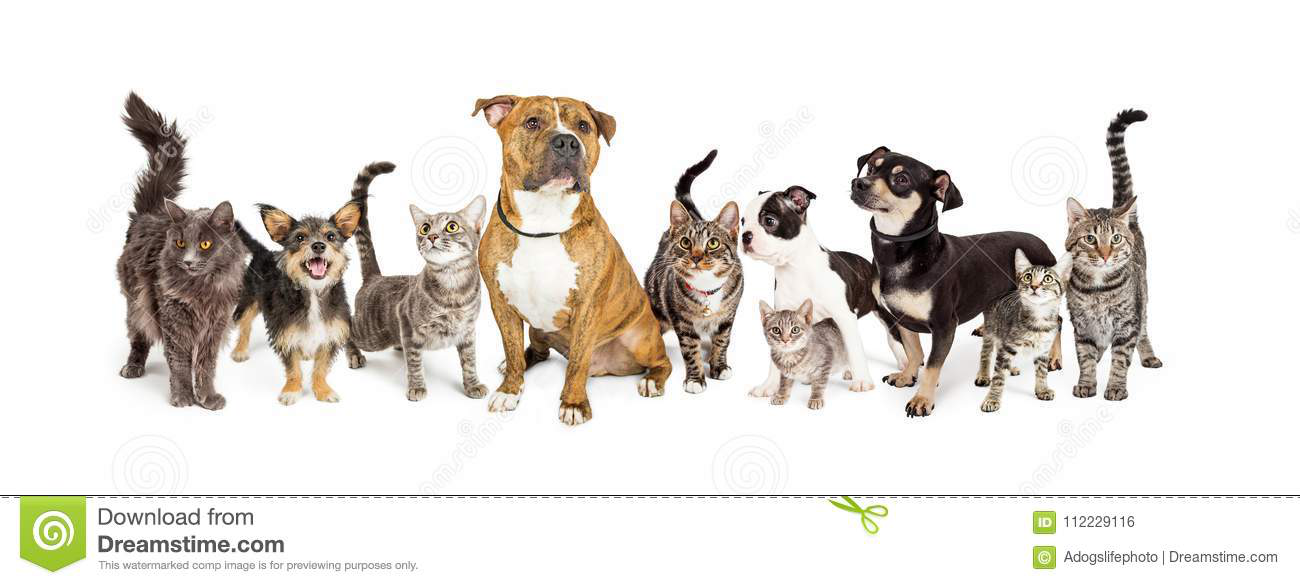

In [6]:
# web image
#url  =  'https://raw.githubusercontent.com/hufsbme/T10402101/master/ch13_computer_vision/IMG_6996.jpeg
url = 'https://thumbs.dreamstime.com/z/row-cats-dogs-together-white-different-size-breeds-isolated-social-media-web-banner-112229116.jpg'

input_image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

# google drive image
#url  = '/content/drive/My Drive/hufs/image/hufs_campus.png'
#input_image = Image.open(url).convert("RGB")

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

input_image

- 사진 속의 object를 제대로 segmentation하였는지 확인해 봅니다.

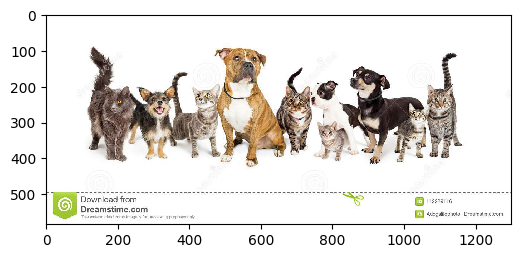

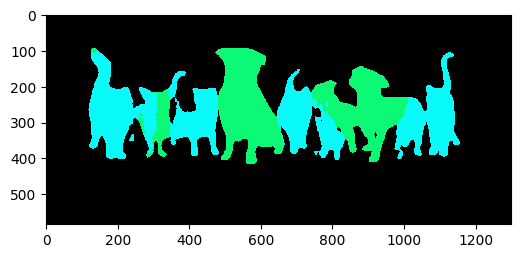

In [7]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)
plt.figure(dpi=100)
plt.imshow(input_image)
plt.show()

plt.figure(dpi=100)
plt.imshow(r)
plt.show()